In [1220]:
import numpy
import pandas as pd
import csv
import requests as rq
from functions import *
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1221]:
social = pd.read_csv('data_social.csv')
social = social.assign(total_25=social['x_25'] + social['ig_25'] + social['fb_25'] + social['tt_25'])
social = social.drop(columns=['x_25', 'fb_25', 'tt_25'])

ig = pd.read_csv('ig_data.csv')
social = pd.merge(ig, social, how='left', on='team')
teams = list(social['team'])

social.head(5)

,team,ig_18,ig_24,ig_25,total_25
0,Golden State Warriors,9.1,32.5,32.7,62.000
1,Los Angeles Lakers,5.3,24.6,25.3,64.100
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273
3,Chicago Bulls,3.6,10.1,10.2,33.600
4,Boston Celtics,2.8,8.3,8.4,23.500


In [1222]:
val_22 = pd.read_csv("val_22.csv")
valuation = pd.read_csv('valuation.csv')
valuation = pd.merge(valuation, val_22, how='left', on='team')
social = pd.merge(social, valuation, how='left', on='team')
valuation.head(5)

,team,val_18,val_24,val_25,ig_20,val_22
0,Golden State Warriors,3.10,8.8,9.4,26.8,7.0
1,New York Knicks,3.60,7.5,7.5,3.6,6.1
2,Los Angeles Lakers,3.30,7.1,7.0,21.5,5.9
3,Boston Celtics,2.50,6.0,6.1,7.1,4.0
4,LA Clippers,2.15,5.5,5.5,4.6,3.9


In [1223]:
# 2018
jerseys_18 = ['Cleveland Cavaliers', 'Golden State Warriors', 
                            'Golden State Warriors', 'Milwaukee Bucks', 'Boston Celtics', 
                            'Oklahoma City Thunder', 'New York Knicks', 'Philadelphia 76ers', 
                            'Houston Rockets', 'Philadelphia 76ers', 'San Antonio Spurs', 
                            'Los Angeles Lakers', 'Portland Trail Blazers', 'Golden State Warriors', 
                            'Minnesota Timberwolves']
update_sales(jersey_sales, jerseys_18)

col_jerseys_18 = {c: 0 for c in teams}
update_sales(col_jerseys_18, jerseys_18)
social['sales_18'] = social['team'].map(lambda team: col_jerseys_18[team])
social.head(5)

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,sales_18
0,Golden State Warriors,9.1,32.5,32.7,62.000,3.100,8.80,9.40,26.8,7.00,3
1,Los Angeles Lakers,5.3,24.6,25.3,64.100,3.300,7.10,7.00,21.5,5.90,1
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273,1.325,3.35,3.95,14.7,2.05,1
3,Chicago Bulls,3.6,10.1,10.2,33.600,2.600,5.00,5.80,9.3,4.10,0
4,Boston Celtics,2.8,8.3,8.4,23.500,2.500,6.00,6.10,7.1,4.00,1


In [1224]:
# 2024
jerseys_24 = ['Golden State Warriors', 'Boston Celtics', 'Los Angeles Lakers', 
              'San Antonio Spurs', 'Milwaukee Bucks', 'Dallas Mavericks', 'Phoenix Suns', 
              'Phoenix Suns', 'Philadelphia 76ers', 'Milwaukee Bucks', 'Memphis Grizzlies', 
              'Philadelphia 76ers', 'Charlotte Hornets', 'Denver Nuggets', 'Sacramento Kings']
update_sales(jersey_sales, jerseys_24)

col_jerseys_24 = {c: 0 for c in teams}
update_sales(col_jerseys_24, jerseys_24)

update_sales(col_jerseys_18, jerseys_18)
social['sales_24'] = social['team'].map(lambda team: col_jerseys_24[team])
social.head(5)

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,sales_18,sales_24
0,Golden State Warriors,9.1,32.5,32.7,62.000,3.100,8.80,9.40,26.8,7.00,3,1
1,Los Angeles Lakers,5.3,24.6,25.3,64.100,3.300,7.10,7.00,21.5,5.90,1,1
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273,1.325,3.35,3.95,14.7,2.05,1,0
3,Chicago Bulls,3.6,10.1,10.2,33.600,2.600,5.00,5.80,9.3,4.10,0,0
4,Boston Celtics,2.8,8.3,8.4,23.500,2.500,6.00,6.10,7.1,4.00,1,1


In [1225]:
# Manually getting each for 2025
jersey_sales = {c: 0 for c in teams}
jersey_sales['Los Angeles Lakers'] += 2
jersey_sales['Golden State Warriors'] += 1
jersey_sales['Boston Celtics'] += 2
jersey_sales['New York Knicks'] += 1
jersey_sales['San Antonio Spurs'] += 1
jersey_sales['Minnesota Timberwolves'] += 1
jersey_sales['Memphis Grizzlies'] += 1
jersey_sales['Oklahoma City Thunder'] += 1
jersey_sales['Denver Nuggets'] += 1
jersey_sales['Milwaukee Bucks'] += 1
jersey_sales['Charlotte Hornets'] += 1
jersey_sales['Phoenix Suns'] += 2

social['sales_25'] = social['team'].map(lambda team: jersey_sales[team])
social.head(5)

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,sales_18,sales_24,sales_25
0,Golden State Warriors,9.1,32.5,32.7,62.000,3.100,8.80,9.40,26.8,7.00,3,1,1
1,Los Angeles Lakers,5.3,24.6,25.3,64.100,3.300,7.10,7.00,21.5,5.90,1,1,2
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273,1.325,3.35,3.95,14.7,2.05,1,0,0
3,Chicago Bulls,3.6,10.1,10.2,33.600,2.600,5.00,5.80,9.3,4.10,0,0,0
4,Boston Celtics,2.8,8.3,8.4,23.500,2.500,6.00,6.10,7.1,4.00,1,1,2


In [1226]:
# 2023
update_sales(jersey_sales, ['Los Angeles Lakers', 'Golden State Warriors', 
                            'Boston Celtics', 'Milwaukee Bucks', 'Dallas Mavericks', 
                            'Phoenix Suns', 'Phoenix Suns', 'Memphis Grizzlies', 
                            'Portland Trail Blazers', 'Dallas Mavericks', 'Charlotte Hornets', 
                            'Denver Nuggets', 'Philadelphia 76ers', 
                            'Boston Celtics', 'Golden State Warriors'])
dict(list(jersey_sales.items())[:5])

{'Golden State Warriors': 3,
 'Los Angeles Lakers': 3,
 'Cleveland Cavaliers': 0,
 'Chicago Bulls': 0,
 'Boston Celtics': 4}

In [1227]:
# 2022
update_sales(jersey_sales, ['Los Angeles Lakers', 'Philadelphia 76ers', 
                            'Golden State Warriors', 'Brooklyn Nets', 'Boston Celtics', 
                            'Philadelphia 76ers', 'Milwaukee Bucks', 'Dallas Mavericks', 
                            'Memphis Grizzlies', 'Brooklyn Nets', 'Atlanta Hawks', 
                            'Golden State Warriors', 'Phoenix Suns', 'Charlotte Hornets', 
                            'Denver Nuggets'])
dict(list(jersey_sales.items())[:5])

{'Golden State Warriors': 5,
 'Los Angeles Lakers': 4,
 'Cleveland Cavaliers': 0,
 'Chicago Bulls': 0,
 'Boston Celtics': 5}

In [1228]:
# 2020
jerseys_20 = ['Los Angeles Lakers', 'Dallas Mavericks', 
                            'Los Angeles Lakers', 'Boston Celtics', 'Milwaukee Bucks', 
                            'Golden State Warriors', 'Brooklyn Nets', 'Portland Trail Blazers', 
                            'LA Clippers', 'Miami Heat', 'Boston Celtics', 
                            'Brooklyn Nets', 'Houston Rockets', 'Denver Nuggets', 
                            'Memphis Grizzlies']
update_sales(jersey_sales, jerseys_20)

col_jerseys_20 = {c: 0 for c in teams}
update_sales(col_jerseys_20, jerseys_20)
social['sales_20'] = social['team'].map(lambda team: col_jerseys_20[team])
social.head(5)

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,sales_18,sales_24,sales_25,sales_20
0,Golden State Warriors,9.1,32.5,32.7,62.000,3.100,8.80,9.40,26.8,7.00,3,1,1,1
1,Los Angeles Lakers,5.3,24.6,25.3,64.100,3.300,7.10,7.00,21.5,5.90,1,1,2,2
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273,1.325,3.35,3.95,14.7,2.05,1,0,0,0
3,Chicago Bulls,3.6,10.1,10.2,33.600,2.600,5.00,5.80,9.3,4.10,0,0,0,0
4,Boston Celtics,2.8,8.3,8.4,23.500,2.500,6.00,6.10,7.1,4.00,1,1,2,2


In [1229]:
# 2019
update_sales(jersey_sales, ['Los Angeles Lakers', 'Golden State Warriors', 
                            'Milwaukee Bucks', 'Boston Celtics', 'Philadelphia 76ers', 
                            'Houston Rockets', 'Oklahoma City Thunder', 'Golden State Warriors', 
                            'Philadelphia 76ers', 'Philadelphia 76ers', 'Miami Heat', 
                            'Oklahoma City Thunder', 'Dallas Mavericks', 'Portland Trail Blazers', 
                            'Boston Celtics'])
dict(list(jersey_sales.items())[:5])

{'Golden State Warriors': 8,
 'Los Angeles Lakers': 7,
 'Cleveland Cavaliers': 0,
 'Chicago Bulls': 0,
 'Boston Celtics': 9}

In [1230]:
social['jersey_sales'] = 0
social.head(5)

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,sales_18,sales_24,sales_25,sales_20,jersey_sales
0,Golden State Warriors,9.1,32.5,32.7,62.000,3.100,8.80,9.40,26.8,7.00,3,1,1,1,0
1,Los Angeles Lakers,5.3,24.6,25.3,64.100,3.300,7.10,7.00,21.5,5.90,1,1,2,2,0
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273,1.325,3.35,3.95,14.7,2.05,1,0,0,0,0
3,Chicago Bulls,3.6,10.1,10.2,33.600,2.600,5.00,5.80,9.3,4.10,0,0,0,0,0
4,Boston Celtics,2.8,8.3,8.4,23.500,2.500,6.00,6.10,7.1,4.00,1,1,2,2,0


In [1231]:
social['jersey_sales'] = social['team'].map(lambda team: jersey_sales[team])
social = social.rename(columns={'jersey_sales': 'sales'})
social.head(5)

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,sales_18,sales_24,sales_25,sales_20,sales
0,Golden State Warriors,9.1,32.5,32.7,62.000,3.100,8.80,9.40,26.8,7.00,3,1,1,1,8
1,Los Angeles Lakers,5.3,24.6,25.3,64.100,3.300,7.10,7.00,21.5,5.90,1,1,2,2,7
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273,1.325,3.35,3.95,14.7,2.05,1,0,0,0,0
3,Chicago Bulls,3.6,10.1,10.2,33.600,2.600,5.00,5.80,9.3,4.10,0,0,0,0,0
4,Boston Celtics,2.8,8.3,8.4,23.500,2.500,6.00,6.10,7.1,4.00,1,1,2,2,9


In [1232]:
attendance = pd.read_csv('attendance.csv')
social = pd.merge(social, attendance, how='left', on='team')
social.head(5)

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,sales_18,sales_24,sales_25,sales_20,sales,a%_18,a%_24,a%_25
0,Golden State Warriors,9.1,32.5,32.7,62.000,3.100,8.80,9.40,26.8,7.00,3,1,1,1,8,100.0,100.0,100.0
1,Los Angeles Lakers,5.3,24.6,25.3,64.100,3.300,7.10,7.00,21.5,5.90,1,1,2,2,7,98.2,99.0,99.0
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273,1.325,3.35,3.95,14.7,2.05,1,0,0,0,0,95.2,96.0,96.0
3,Chicago Bulls,3.6,10.1,10.2,33.600,2.600,5.00,5.80,9.3,4.10,0,0,0,0,0,99.8,100.0,100.0
4,Boston Celtics,2.8,8.3,8.4,23.500,2.500,6.00,6.10,7.1,4.00,1,1,2,2,9,100.0,100.0,100.0


In [1233]:
social[social['team'] == 'Atlanta Hawks']

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,sales_18,sales_24,sales_25,sales_20,sales,a%_18,a%_24,a%_25
22,Atlanta Hawks,0.812,2.6,2.6,7.0,1.15,2.7,3.8,2.3,1.975,0,0,0,0,1,95.0,97.0,97.0


In [1234]:
# Growth features
social['val_growth'] = social['val_25'] - social['val_18']
social['sales_growth_abs'] = social['sales_25'] - social['sales_18']
social['sales_growth_1yr'] = social['sales_25'] - social['sales_24']
social['ig_growth_5yr_abs'] = social['ig_25'] - social['ig_20']

# Growth rates / ratios
social['ig_growth_pct'] = (social['ig_25'] - social['ig_18']) / social['ig_18']
social['val_growth_pct'] = (social['val_25'] - social['val_18']) / social['val_18']
social['sales_growth_pct'] = np.where(
    social['sales_18'] > 0,
    (social['sales_25'] - social['sales_18']) / social['sales_18'],
    0
)
social['a_growth_%'] = (social['a%_25'] - social['a%_18']) / social['a%_18']
social['ig_growth_5yr_pct'] = (social['ig_25'] - social['ig_20']) / social['ig_20']

# Signal jersey sale
social['has_sales_18'] = (social['sales_18'] > 0).astype(int)
social['has_sales_25'] = (social['sales_25'] > 0).astype(int)

social.head(5)

,team,ig_18,ig_24,ig_25,total_25,val_18,val_24,val_25,ig_20,val_22,...,sales_growth_abs,sales_growth_1yr,ig_growth_5yr_abs,ig_growth_pct,val_growth_pct,sales_growth_pct,a_growth_%,ig_growth_5yr_pct,has_sales_18,has_sales_25
0,Golden State Warriors,9.1,32.5,32.7,62.000,3.100,8.80,9.40,26.8,7.00,...,-2,0,5.9,2.593407,2.032258,-0.666667,0.000000,0.220149,1,1
1,Los Angeles Lakers,5.3,24.6,25.3,64.100,3.300,7.10,7.00,21.5,5.90,...,1,1,3.8,3.773585,1.121212,1.000000,0.008147,0.176744,1,1
2,Cleveland Cavaliers,6.7,16.6,16.5,28.273,1.325,3.35,3.95,14.7,2.05,...,-1,0,1.8,1.462687,1.981132,-1.000000,0.008403,0.122449,1,0
3,Chicago Bulls,3.6,10.1,10.2,33.600,2.600,5.00,5.80,9.3,4.10,...,0,0,0.9,1.833333,1.230769,0.000000,0.002004,0.096774,0,0
4,Boston Celtics,2.8,8.3,8.4,23.500,2.500,6.00,6.10,7.1,4.00,...,1,1,1.3,2.000000,1.440000,1.000000,0.000000,0.183099,1,1


In [1235]:
compute_vif(social, ['a%_25', 'a_growth_%'])

,feature,VIF
0,a%_25,1.883203
1,a_growth_%,1.883203


In [1236]:
drop_cols = [
    'ig_24', 'val_24', 'val_growth', 'sales_24', 'sales', 'sales_growth_abs',
    'a%_24', 'has_sales_18'
]
social.drop(columns=drop_cols, inplace=True)
list(social.columns)

['team',
 'ig_18',
 'ig_25',
 'total_25',
 'val_18',
 'val_25',
 'ig_20',
 'val_22',
 'sales_18',
 'sales_25',
 'sales_20',
 'a%_18',
 'a%_25',
 'sales_growth_1yr',
 'ig_growth_5yr_abs',
 'ig_growth_pct',
 'val_growth_pct',
 'sales_growth_pct',
 'a_growth_%',
 'ig_growth_5yr_pct',
 'has_sales_25']

| Feature                      | What it Represents                            |
| ---------------------------- | --------------------------------------------- |
| `ig_18`, `ig_20`, `ig_25`    | Instagram followers (2018, 2020, 2025)        |
| `ig_growth_pct`              | IG % growth from 2018 to 2025                 |
| `ig_growth_5yr_abs`          | IG absolute growth from 2020 to 2025          |
| `ig_growth_5yr_pct`          | IG % growth from 2020 to 2025                 |
| `val_18`, `val_23`, `val_25` | Team valuations (in billions) for those years |
| `val_growth_pct`             | Valuation % growth from 2018 to 2025          |
| `sales_18`, `sales_25`       | Jersey sales snapshots                        |
| `sales_growth_pct`           | Sales % growth from 2018 to 2025              |
| `sales_growth_1yr`           | Sales delta from 2024 to 2025                 |
| `a%_18`, `a%_25`             | Attendance % for 2018 and 2025                |
| `a_growth_%`                 | Attendance % growth (2018 → 2025)             |
| `has_sales_25`               | Whether team had nonzero jersey sales in 2025 |
| `total_25`                   | Total social media following (2025)           |


In [1237]:
# To stay organized
ig_20_col = social.pop('ig_20')
ig_18_index = social.columns.get_loc('ig_18')
social.insert(ig_18_index + 1, 'ig_20', ig_20_col)

sales_20_col = social.pop('sales_20')
sales_18_index = social.columns.get_loc('sales_18')
social.insert(sales_18_index + 1, 'sales_20', sales_20_col)

social.iloc[:, 5:13].head(5)

,val_18,val_25,val_22,sales_18,sales_20,sales_25,a%_18,a%_25
0,3.100,9.40,7.00,3,1,1,100.0,100.0
1,3.300,7.00,5.90,1,2,2,98.2,99.0
2,1.325,3.95,2.05,1,0,0,95.2,96.0
3,2.600,5.80,4.10,0,0,0,99.8,100.0
4,2.500,6.10,4.00,1,2,2,100.0,100.0


In [1238]:
social['val_trend_slope'] = social.apply(compute_val_trend_slope, axis=1)
social['val_trend_slope'].head(5)

0    0.904054
1    0.535135
2    0.364527
3    0.452703
4    0.506757
Name: val_trend_slope, dtype: float64

In [1239]:
X = social.drop(columns=['team', 'val_25'])  # input features
y = social['val_25'] 

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [1240]:
importances = model.feature_importances_
features = X.columns

for name, score in zip(features, importances):
    print(f"{name}: {score:.4f}")

ig_18: 0.0136
ig_20: 0.0158
ig_25: 0.0056
total_25: 0.0109
val_18: 0.2606
val_22: 0.3365
sales_18: 0.0116
sales_20: 0.0009
sales_25: 0.0017
a%_18: 0.0036
a%_25: 0.0046
sales_growth_1yr: 0.0067
ig_growth_5yr_abs: 0.0111
ig_growth_pct: 0.0050
val_growth_pct: 0.0079
sales_growth_pct: 0.0101
a_growth_%: 0.0075
ig_growth_5yr_pct: 0.0149
has_sales_25: 0.0019
val_trend_slope: 0.2697


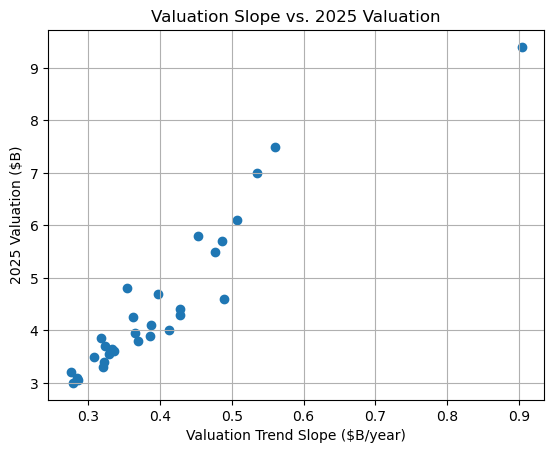

In [1241]:
import matplotlib.pyplot as plt

plt.scatter(social['val_trend_slope'], social['val_25'])
plt.xlabel("Valuation Trend Slope ($B/year)")
plt.ylabel("2025 Valuation ($B)")
plt.title("Valuation Slope vs. 2025 Valuation")
plt.grid(True)
plt.show()

In [1242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'social' is your DataFrame with relevant features
X = social.drop(columns=['team', 'val_25'])  # Features
y = social['val_25']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.48957336869292034


/Users/marceloarcos/miniforge3/envs/dsc80/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1243]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
cv = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
print("LOOCV RMSE:", -scores.mean())

LOOCV RMSE: 0.33981666666666627


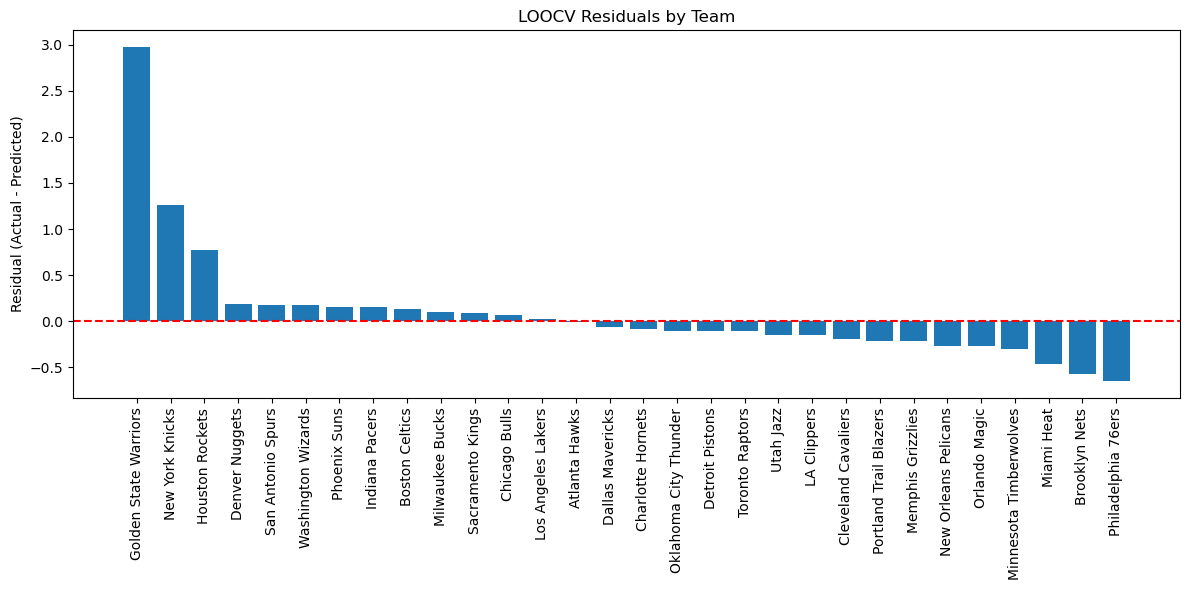

In [1244]:
residuals_df = pd.DataFrame({
    'team': social['team'],
    'residual': errors,
    'actual': y,
    'predicted': y - np.array(errors)
})

# Sort by residual
residuals_df = residuals_df.sort_values(by='residual', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(residuals_df['team'], residuals_df['residual'])
plt.axhline(0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.title("LOOCV Residuals by Team")
plt.ylabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()

In [1245]:
residuals_df = pd.DataFrame({
    'team': social['team'],
    'residual': errors,
    'actual': y,
    'predicted': y - np.array(errors)
})
residuals_df.sort_values(by='residual', ascending=False).head(5)

,team,residual,actual,predicted
0,Golden State Warriors,2.9730,9.40,6.4270
15,New York Knicks,1.2620,7.50,6.2380
6,Houston Rockets,0.7785,5.70,4.9215
20,Denver Nuggets,0.1850,3.90,3.7150
10,San Antonio Spurs,0.1820,3.85,3.6680


In [1246]:
X = social.drop(columns=['team', 'val_25'])
y = social['val_25']

In [1247]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=300,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42)

preds = []
loo = LeaveOneOut()
for train_idx, test_idx in loo.split(X):
    rf.fit(X.iloc[train_idx], y.iloc[train_idx])
    xgb_model.fit(X.iloc[train_idx], y.iloc[train_idx])
    
    rf_pred = rf.predict(X.iloc[test_idx])
    xgb_pred = xgb_model.predict(X.iloc[test_idx])
    
    avg_pred = (rf_pred + xgb_pred) / 2
    true_val = y.iloc[test_idx].values[0]
    preds.append(true_val - avg_pred[0])  # residual

In [1248]:
from sklearn.metrics import mean_squared_error
print("Blended RMSE:", mean_squared_error(y, y - np.array(preds), squared=False))

Blended RMSE: 0.6648609331367833


/Users/marceloarcos/miniforge3/envs/dsc80/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
